# The Monty Hall Problem
### An Empirical Investigation

In [2]:
import random


In [2]:
def run_monty_hall(num_doors):
    doors = [False for x in xrange(num_doors)]
    
    prize = int(num_doors*random.random())
    
    doors[prize]=True
    
    guess = int(num_doors*random.random())
    
    if doors[guess] == True:
        return True
    else:
        return False
    

In [3]:
num_correct = 0
num_runs = 1000000
for i in xrange(num_runs):
    if run_monty_hall(3):
        num_correct += 1
print 1.0*num_correct/num_runs

0.333245


In [4]:
def should_switch():
    num_doors = 3
    
    doors = [False for x in xrange(num_doors)]
    
    prize = int(num_doors*random.random())
    
    doors[prize]=True
    
    guess = int(num_doors*random.random())
    
    if doors[guess] == True:
        return False
    else:
        return True
     

In [5]:
num_should_switch = 0
num_not_switch = 0
num_runs = 1000
for i in xrange(num_runs):
    run = should_switch()
    if run==True:
        num_should_switch += 1
    else:
        num_not_switch += 1
print "Should switch: " + str(100.0*num_should_switch/num_runs) + "%"
print "Should not switch: " + str(100.0*num_not_switch/num_runs) + "%"

Should switch: 66.1%
Should not switch: 33.9%


In [6]:
def should_switch_doors(num_doors):
    #Assume prize is door 0
    guess = int(num_doors*random.random())
    if guess == 0:
        return -1
    switch = int((num_doors-2)*random.random())
    if switch == 0:
        return 1
    return 0
    
    
    

In [7]:
num_should_switch = 0
num_not_switch = 0
num_runs = 10000
for i in xrange(num_runs):
    run = should_switch_doors(1000)
    if run==1:
        num_should_switch += 1
    elif run == -1:
        num_not_switch += 1
print "Should switch: " + str(100.0*num_should_switch/num_runs) + "%"
print "Should not switch: " + str(100.0*num_not_switch/num_runs) + "%"

Should switch: 0.13%
Should not switch: 0.12%


In [20]:
switch = [0 for i in xrange(100)]
notswitch = [0 for i in xrange(100)]
neither = [0 for i in xrange(100)]

In [21]:
def simulate(num_doors,num_runs=100000):
    num_should_switch = 0
    num_not_switch = 0
    num_neither = 0
    for i in xrange(num_runs):
        run = should_switch_doors(num_doors)
        if run==1:
            num_should_switch += 1
        elif run == -1:
            num_not_switch += 1
        else:
            num_neither += 1
    return [1.0*num_should_switch/num_runs,1.0*num_not_switch/num_runs, 1.0*num_neither/num_runs]

In [22]:
for n in xrange(3,100):
    res = simulate(n,1000000)
    switch[n] = res[0]
    notswitch[n] = res[1]
    neither[n] = res[2]
    if n % 5 == 0:
        print "Result %i" % n
        print res

Result 5
[0.266528, 0.200167, 0.533305]
Result 10
[0.112412, 0.100247, 0.787341]
Result 15
[0.071276, 0.06664, 0.862084]
Result 20
[0.052986, 0.04999, 0.897024]
Result 25
[0.041394, 0.039909, 0.918697]
Result 30
[0.034606, 0.033522, 0.931872]
Result 35
[0.029257, 0.028624, 0.942119]
Result 40
[0.025811, 0.025265, 0.948924]
Result 45
[0.022654, 0.0223, 0.955046]
Result 50
[0.020445, 0.020223, 0.959332]
Result 55
[0.018551, 0.01821, 0.963239]
Result 60
[0.016762, 0.016669, 0.966569]
Result 65
[0.01565, 0.015317, 0.969033]
Result 70
[0.014673, 0.014372, 0.970955]
Result 75
[0.013425, 0.013352, 0.973223]
Result 80
[0.012677, 0.012458, 0.974865]
Result 85
[0.012153, 0.011705, 0.976142]
Result 90
[0.011055, 0.01105, 0.977895]
Result 95
[0.010513, 0.010571, 0.978916]


In [24]:
%matplotlib inline
import matplotlib.pyplot as plt

In [23]:
axis_nums = [i for i in xrange(100)]

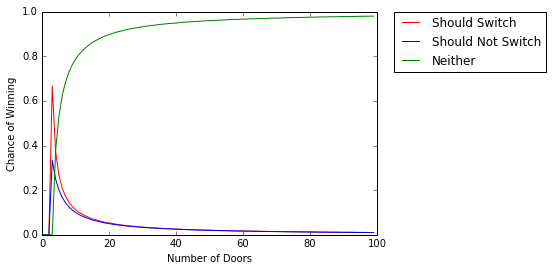

In [26]:
plt.plot(axis_nums,switch,'r-',label='Should Switch')
plt.plot(axis_nums,notswitch,'b-',label='Should Not Switch')
plt.plot(axis_nums,neither,'g-',label='Neither')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("Number of Doors")
plt.ylabel("Chance of Winning")
plt.show()

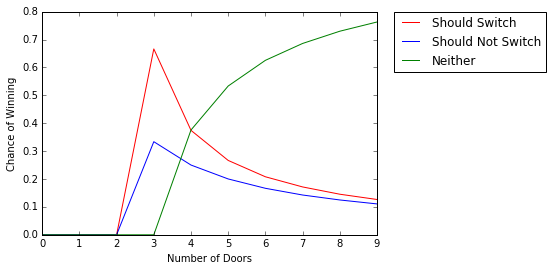

In [27]:
plt.plot(axis_nums[:10],switch[:10],'r-',label='Should Switch')
plt.plot(axis_nums[:10],notswitch[:10],'b-',label='Should Not Switch')
plt.plot(axis_nums[:10],neither[:10],'g-',label='Neither')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("Number of Doors")
plt.ylabel("Chance of Winning")
plt.show()